# Consider only the below columns and prepare a prediction model for predicting Price. "Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [3]:
#Read the data
toyota = pd.read_csv("C:\\My Computer\\Documents\\Excler\\Assignment\\Multi Linear Regression\\ToyotaCorolla.csv")
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:
toyota.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [4]:
toyota1 = toyota.drop(['Id','Mfg_Month', 'Mfg_Year', 'Fuel_Type', 'Met_Color', 'Color', 'Automatic', 'Cylinders', 'Mfr_Guarantee', 'BOVAG_Guarantee',                       
'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows','Power_Steering',      
'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette','Tow_Bar'], axis = 1)

In [5]:
toyota1.head()

,Model,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,2000,3,5,210,1165
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,2000,3,5,210,1165
2,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,2000,3,5,210,1165
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,2000,3,5,210,1165
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,2000,3,5,210,1170


In [6]:
toyota2 = toyota1.rename({'Age_08_04':'Age', 'Quarterly_Tax':'QT'}, axis = 1)

In [7]:
toyota2.head()

,Model,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,2000,3,5,210,1165
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,2000,3,5,210,1165
2,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,2000,3,5,210,1165
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,2000,3,5,210,1165
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,2000,3,5,210,1170


In [8]:
toyota2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Model   1436 non-null   object
 1   Price   1436 non-null   int64 
 2   Age     1436 non-null   int64 
 3   KM      1436 non-null   int64 
 4   HP      1436 non-null   int64 
 5   cc      1436 non-null   int64 
 6   Doors   1436 non-null   int64 
 7   Gears   1436 non-null   int64 
 8   QT      1436 non-null   int64 
 9   Weight  1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


### Scatterplot between variables along with histograms

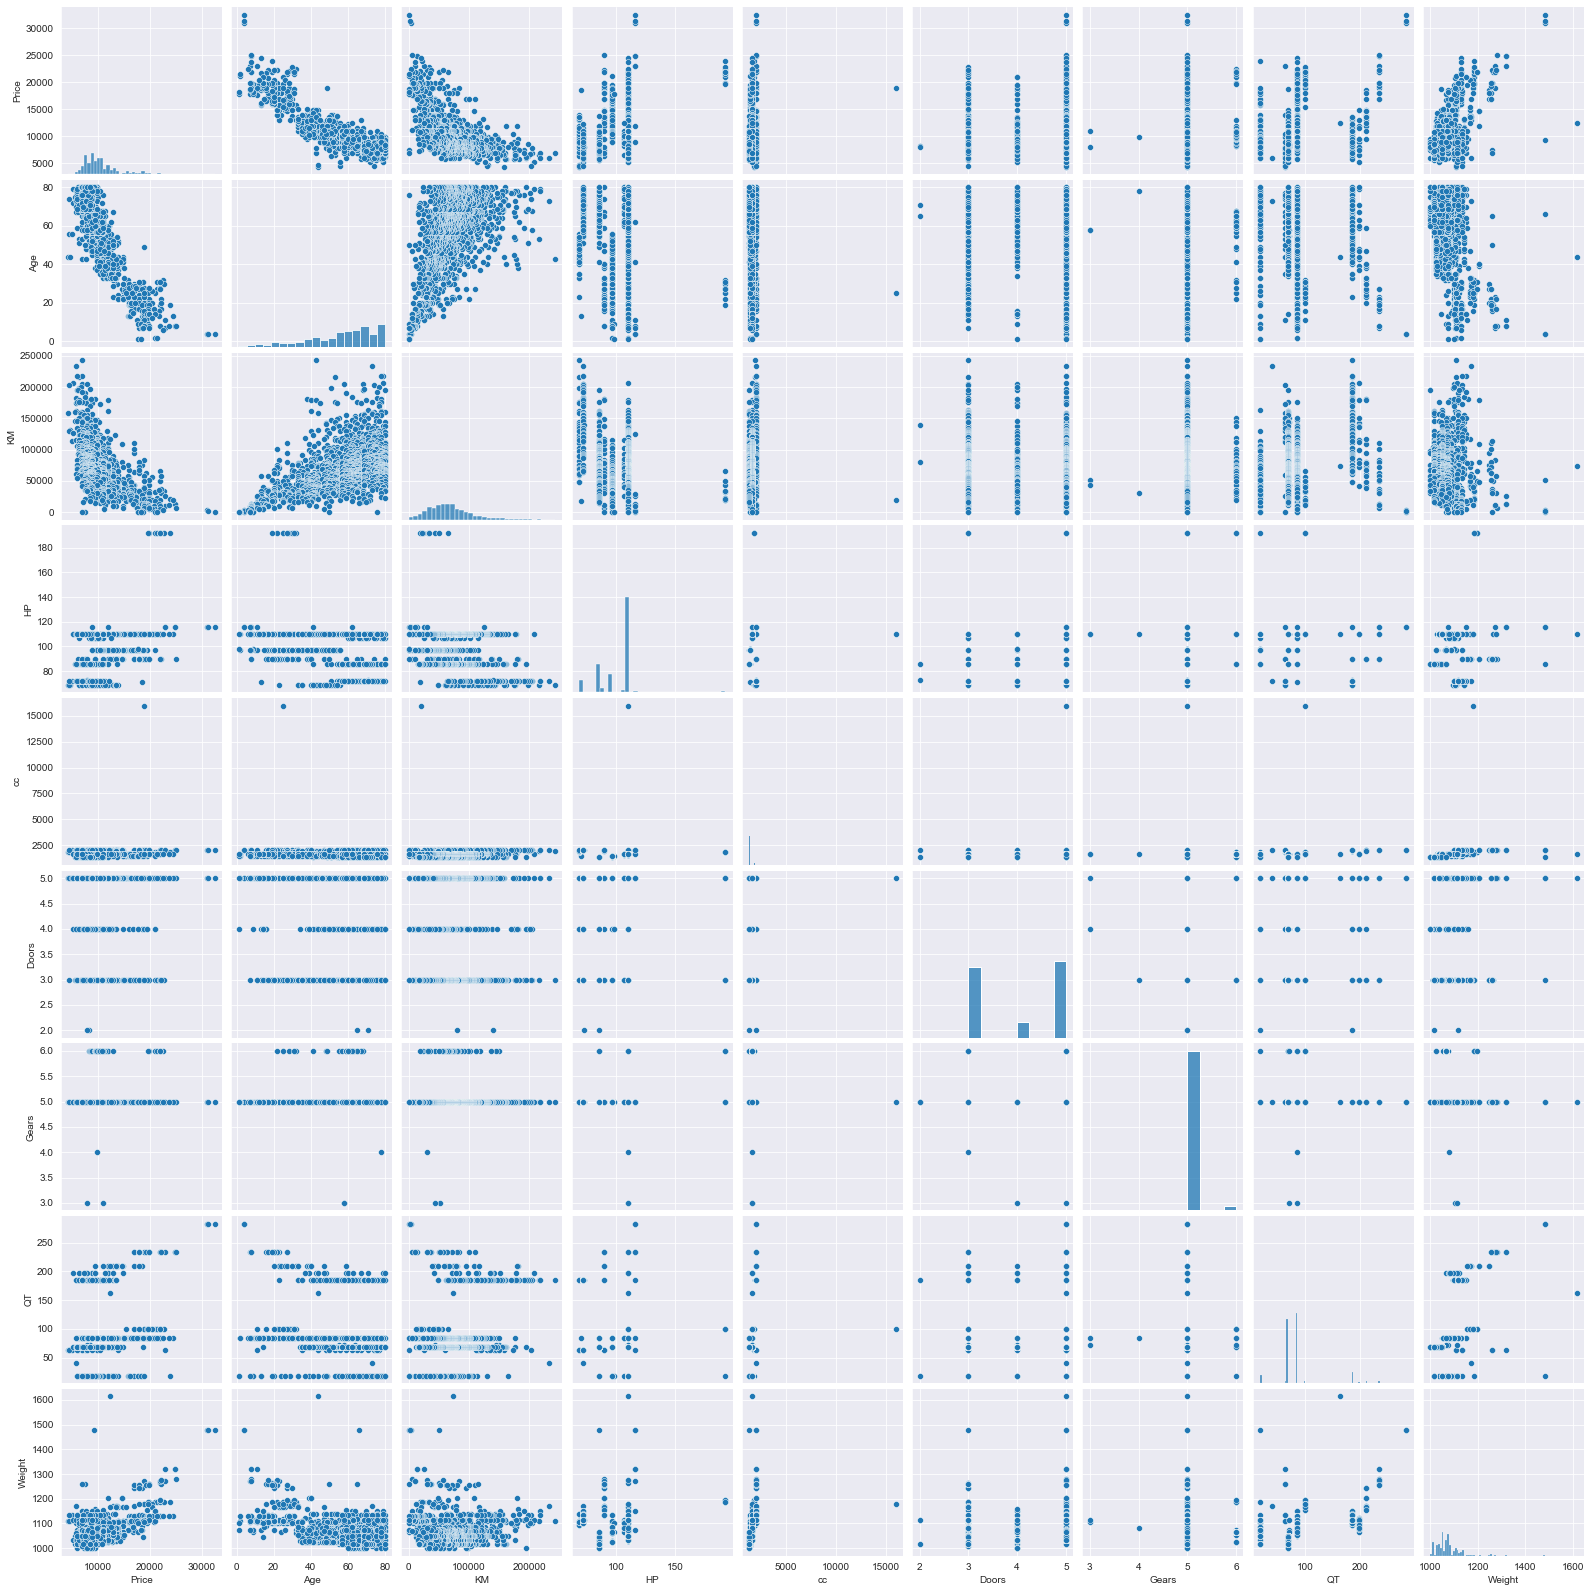

In [9]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(toyota2)

### Correlation Matrix

In [10]:
toyota2.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


### Preparing the model

In [11]:
model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight', data=toyota2).fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sun, 26 Sep 2021   Prob (F-statistic):               0.00
Time:                        16:53:02   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
QT             3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### From the above summary, we can see cc and Doors variables are insignificant. So we will test them individually.

### Simple Linear Regression Models

In [14]:
ml_cc = smf.ols('Price~cc', data=toyota2).fit()
ml_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Sun, 26 Sep 2021   Prob (F-statistic):           1.55e-06
Time:                        16:56:44   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
ml_d = smf.ols('Price~Doors', data=toyota2).fit()
ml_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Sun, 26 Sep 2021   Prob (F-statistic):           1.46e-12
Time:                        16:57:11   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
ml_cc_d = smf.ols('Price~cc+Doors', data=toyota2).fit()
ml_cc_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Sun, 26 Sep 2021   Prob (F-statistic):           1.15e-15
Time:                        16:57:32   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
cc             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

####  Both the variables CC and Doors are significant when tested individually or together.

### Variable Inflation Factor

In [17]:
rsq_age=smf.ols('Age~KM+HP+cc+Doors+Gears+QT+Weight',data=toyota2).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_km=smf.ols('KM~Age+HP+cc+Doors+Gears+QT+Weight',data=toyota2).fit().rsquared
vif_km=1/(1-rsq_km)

rsq_hp=smf.ols('HP~Age+KM+cc+Doors+Gears+QT+Weight',data=toyota2).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_cc=smf.ols('cc~Age+KM+HP+Doors+Gears+QT+Weight',data=toyota2).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_door=smf.ols('Doors~Age+KM+HP+cc+Gears+QT+Weight',data=toyota2).fit().rsquared
vif_door=1/(1-rsq_door)

rsq_gear=smf.ols('Gears~Age+KM+HP+cc+Doors+QT+Weight',data=toyota2).fit().rsquared
vif_gear=1/(1-rsq_gear)

rsq_qt=smf.ols('QT~Age+KM+HP+cc+Doors+Gears+Weight',data=toyota2).fit().rsquared
vif_qt=1/(1-rsq_qt)

rsq_wt=smf.ols('Weight~Age+KM+HP+cc+Doors+Gears+QT',data=toyota2).fit().rsquared
vif_wt=1/(1-rsq_wt)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','cc','Doors','Gears','QT','Weight'], 'Vif':[vif_age,vif_km,vif_hp,vif_cc,vif_door,vif_gear,vif_qt,vif_wt]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,QT,2.311431
7,Weight,2.516420


All the variables have a VIF < 10, therefore the collinearity condition is not satisfied

### Added Variable Plot or Partial Regression Plot

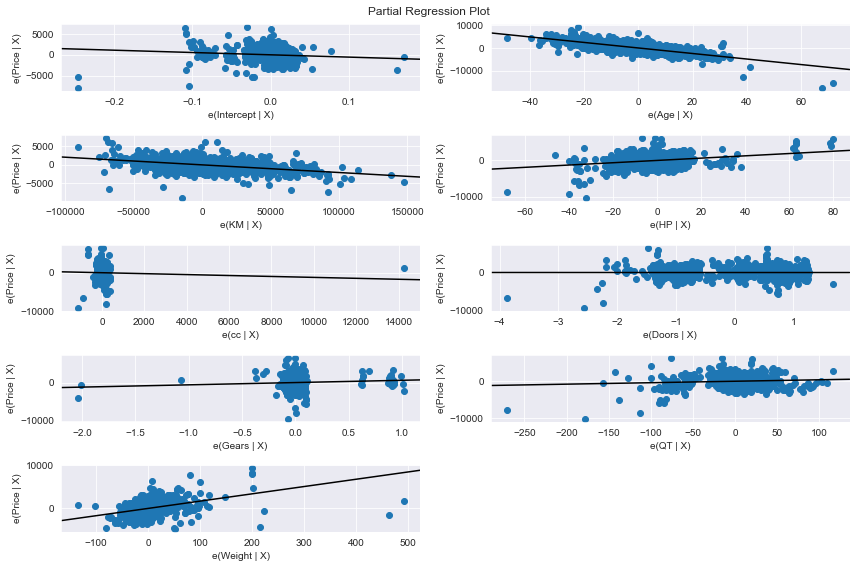

In [18]:
import statsmodels.api as sm
fig = plt.figure(figsize = (12,8))
fig = sm.graphics.plot_partregress_grid(model, fig = fig)
plt.show()

### Rebuilding model with doors column

In [20]:
#ReBuild model
model2 = smf.ols('Price~Age+KM+HP+cc+Gears+QT+Weight',data=toyota2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1293.
Date:                Sun, 26 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:19:13   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1428   BIC:                         2.481e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5575.1401   1409.999     -3.954      0.000   -8341.032   -2809.248
Age         -121.6581      2.615    -46.528      0.000    -126.787    -116.529
KM            -0.0208      0.001    -16.636      0.000      -0.023      -0.018
HP            31.6728      2.810     11.270      0.000      26.160      37.186
cc            -0.1210      0.090     -1.344      0.179      -0.298       0.056
Gears        595.8324    193.400      3.081      0.002     216.453     975.212
QT             3.9531      1.306      3.027      0.003       1.391       6.515
Weight        16.9478      1.033     16.401      0.000      14.921      18.975
==============================================================================
Omnibus:                      151.495   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1009.287
Skew:                          -0.218   Prob(JB):                    6.86e-220
Kurtosis:                       7.084   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking Influential Observations

In [21]:
#Cooks distance
model_influence = model2.get_influence()
(c, _) = model_influence.cooks_distance
c

array([6.96739575e-03, 3.75784888e-03, 5.28338875e-03, ...,
       9.42322432e-07, 7.44544703e-04, 1.20232081e-02])

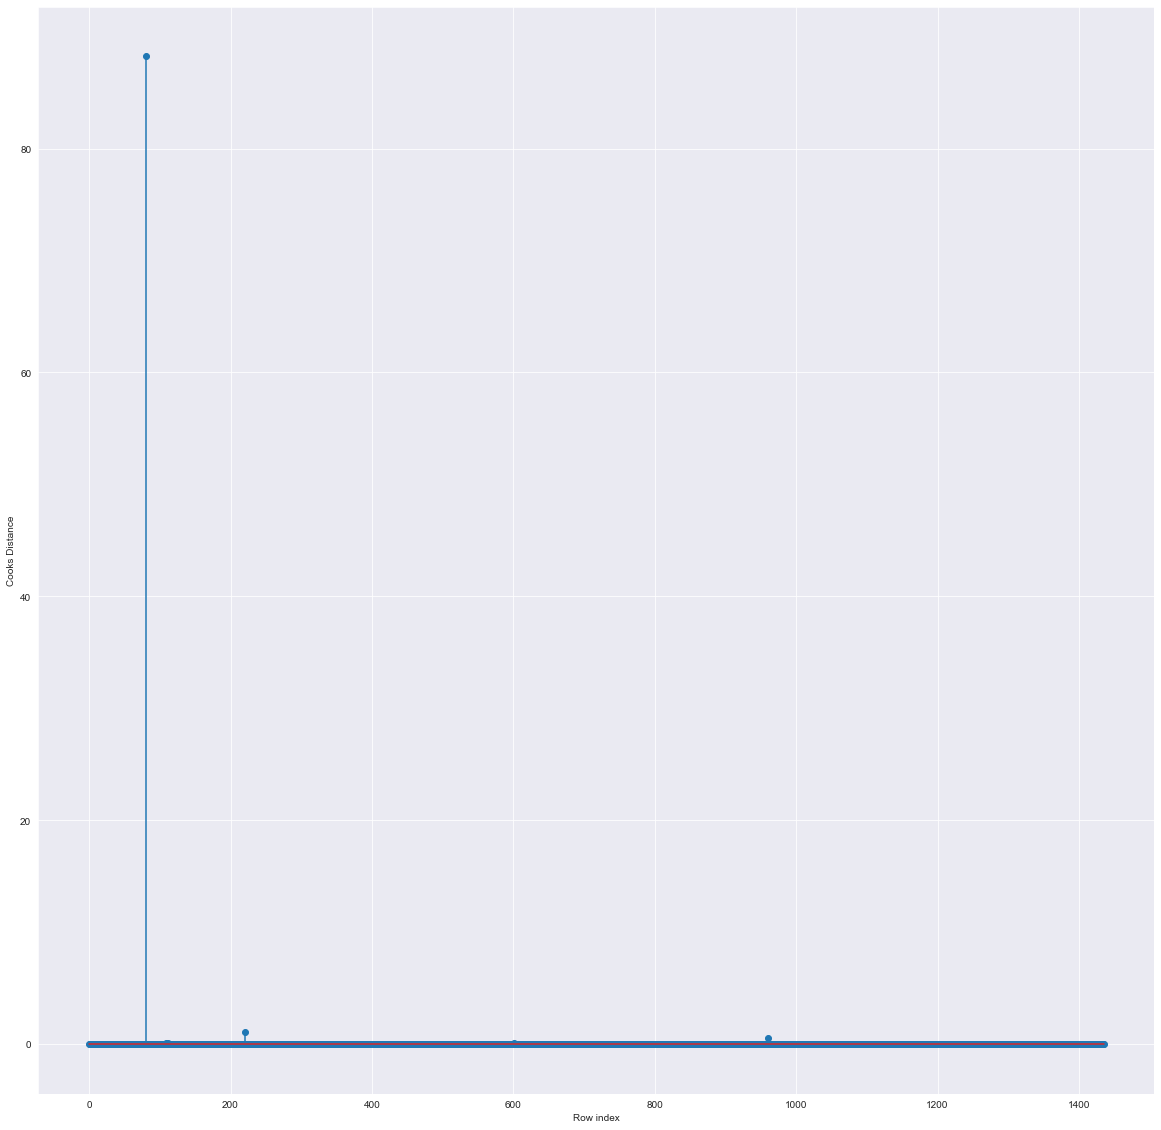

In [27]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 20))
plt.stem(np.arange(len(toyota2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [24]:
toyota2.loc[c>0.5]

,Model,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
80,TOYOTA Corolla 1.6 5drs 1 4/5-Doors,18950,25,20019,110,16000,5,5,100,1180
221,TOYOTA Corolla 1.6 HB LINEA SOL 4/5-Doors,12450,44,74172,110,1600,5,5,163,1615
960,TOYOTA Corolla,9390,66,50806,86,1300,3,5,19,1480


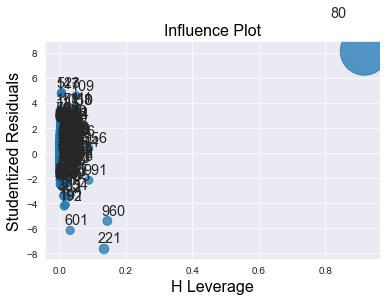

In [25]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model2)
plt.show()

In [26]:
#threshold value formula for h leverage

#h is no of columns
#n is no of rows
k = toyota2.shape[1]
n = toyota2.shape[0]

threshold = 3 * ((k + 1) / n)
threshold

0.02298050139275766

In [28]:
#remove 80th observation
toyota3 = toyota2.drop([80], axis=0)
toyota3

,Model,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,2000,3,5,210,1165
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,2000,3,5,210,1165
2,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,2000,3,5,210,1165
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,2000,3,5,210,1165
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1431,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,1300,3,5,69,1025
1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,1300,3,5,69,1015
1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,1300,3,5,69,1015
1434,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,1300,3,5,69,1015


In [29]:
#building model without 80th observations

model3 = smf.ols('Price~Age+KM+HP+cc+Gears+QT+Weight',data = toyota3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1356.
Date:                Sun, 26 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:31:31   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1427   BIC:                         2.473e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6313.9396   1381.857     -4.569      0.000   -9024.628   -3603.251
Age         -120.4577      2.561    -47.031      0.000    -125.482    -115.433
KM            -0.0179      0.001    -14.029      0.000      -0.020      -0.015
HP            39.1593      2.898     13.512      0.000      33.474      44.844
cc            -2.5069      0.306     -8.188      0.000      -3.107      -1.906
Gears        549.7311    189.216      2.905      0.004     178.561     920.902
QT             9.0759      1.424      6.374      0.000       6.283      11.869
Weight        19.9623      1.076     18.547      0.000      17.851      22.074
==============================================================================
Omnibus:                      239.713   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2556.740
Skew:                          -0.425   Prob(JB):                         0.00
Kurtosis:                       9.484   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Check assumption for errors

In [31]:
#calculating the errors

actual = toyota3.Price
pred = model3.predict(toyota3)
residual = actual - pred

errors_df = pd.DataFrame({"actual":actual, "predictions":pred, "error":residual})
errors_df

,actual,predictions,error
0,13500,16496.007474,-2996.007474
1,13750,16031.645211,-2281.645211
2,13950,16469.939626,-2519.939626
3,14950,16116.490065,-1166.490065
4,13750,15904.461841,-2154.461841
...,...,...,...
1431,7500,8951.852309,-1451.852309
1432,10845,8418.484540,2426.515460
1433,8500,8574.443555,-74.443555
1434,7250,8696.690631,-1446.690631


In [32]:
errors_df.error.mean()

2.45034985101493e-10

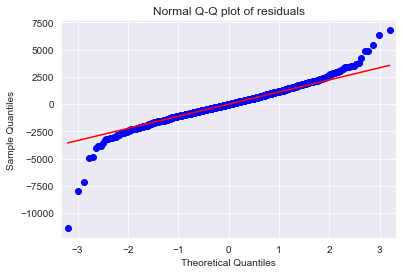

In [33]:
import statsmodels.api as sm

qqplot = sm.qqplot(errors_df.error, line = 'q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

<AxesSubplot:>

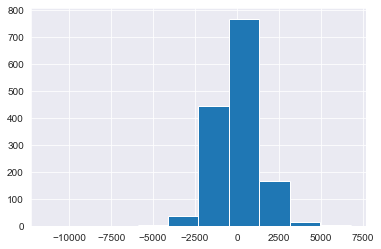

In [34]:
errors_df.error.hist()

### Residual plot for Homoscedasticity

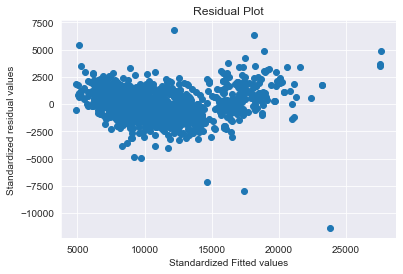

In [35]:
plt.scatter(pred,residual)
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Predicting for new data

In [38]:
new_data=pd.DataFrame({'Age':10,"KM":50000,"HP":100,"cc":1500,"Doors":4,"Gears":6,"QT":87,"Weight":1350},index=[0])
new_data

,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,10,50000,100,1500,4,6,87,1350


In [39]:
model3.predict(new_data)

0    22779.467388
dtype: float64

In [40]:
d2={'Prep_Models':['Model 1', 'Model 2', 'Final_Model'],'Rsquared':[model.rsquared,model2.rsquared, model3.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model 1,0.863763
1,Model 2,0.863763
2,Final_Model,0.869335
